<a href="https://colab.research.google.com/github/tomkart/traffic_cam_nsw/blob/main/traffic_cam_car_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics # install ultralytics package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt
from io import BytesIO
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Function to download image from URL
def download_image(url):
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Safari/537.36"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        image_array = np.array(bytearray(response.content), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    else:
        print("Failed to download image")
        return None

# Load YOLO model
yolo_model = YOLO('yolov8n.pt')  # Using the latest YOLO model

# Function to detect cars using YOLO
def detect_cars(image):
    results = yolo_model(image)
    car_count = 0

    for result in results:
        for box in result.boxes:
            if int(box.cls) in [2, 3, 5, 7]:  # YOLO class IDs for cars, trucks, buses, motorcycles
                car_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return car_count, image



100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]



0: 480x640 18 cars, 2 buss, 44.3ms
Speed: 17.4ms preprocess, 44.3ms inference, 339.2ms postprocess per image at shape (1, 3, 480, 640)
Estimated number of cars: 20


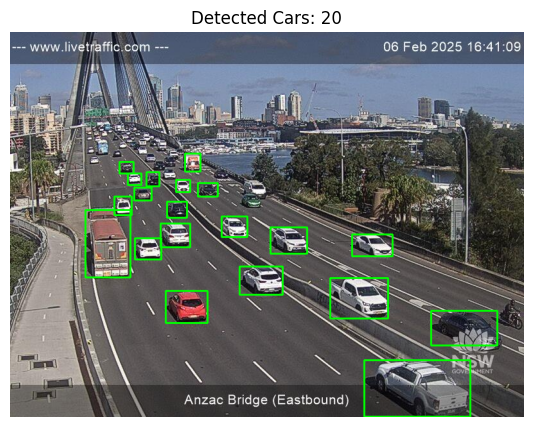

In [4]:
# Main Execution
image_url = "https://webcams.transport.nsw.gov.au/livetraffic-webcams/cameras/anzac_bridge_eastbound.jpeg"
image = download_image(image_url)

if image is not None:
    car_count, processed_image = detect_cars(image)

    print(f"Estimated number of cars: {car_count}")

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected Cars: {car_count}")
    plt.axis("off")
    plt.show()
else:
    print("Could not process image.")
